## How do Embeddings Change with Different Learning Rates?

In [1]:
from pathlib import Path
import sys

script_dir = Path.cwd().parent / "scripts"
sys.path.append(str(script_dir))

# import scripts 
import datasets
import quality_measures

2025-03-02 16:13:35.958500: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
X, y = datasets.load_mnist()

# this line is just for quick testing and should be commented out for the final experiments 
X, y = datasets.load_n_samples(500, X, y)

In [28]:
learning_rates = [1, 50, 200, 800, "auto"]
seeds = [1, 12, 42]

In [27]:
from tqdm import tqdm
from openTSNE import TSNE
def run_tsne(data, labels, learning_rates, seeds, verbose=False): 
    """Returns embedding dictionary with keys given by learning rate and seed used to generate the embedding."""
    embedding_dict = {}
    for eta in tqdm(learning_rates): 
        for seed in tqdm(seeds): 
            tsne = TSNE(learning_rate=eta, n_jobs=-1, random_state=seed, verbose=verbose)
            embedding = tsne.fit(data)
            embedding_dict[(seed, eta)] = (embedding, labels)
    
    return embedding_dict 

In [43]:
import matplotlib.pyplot as plt

def plot_embedding_grid(row_parameter, column_parameter, row_string, column_string, embeddings):
    """
    Plots a grid of t-SNE embeddings.

    Parameters:
    - row_parameter (list): Values to be assigned to rows (e.g., exaggeration values).
    - column_parameter (list): Values to be assigned to columns (e.g., iterations).
    - row_string (str): Label for the row axis.
    - column_string (str): Label for the column axis.
    - embeddings (dict): A dictionary where keys are (row_value, col_value) tuples,
                         and values are (embedding_array, labels).
    """

    num_rows = len(row_parameter)
    num_cols = len(column_parameter)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(3 * num_cols, 3 * num_rows), squeeze=False)

    # Plot embeddings
    for row_idx, row_value in enumerate(row_parameter):
        for col_idx, col_value in enumerate(column_parameter):
            ax = axes[row_idx, col_idx]

            embedding, labels = embeddings[(row_value, col_value)]
            ax.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap="Set1", s=5)
            ax.set_xticks([])
            ax.set_yticks([])

            # Remove plot outlines 
            for spine in ax.spines.values():
                spine.set_visible(False)

            # Add column headers (column values)
            if row_idx == 0:
                ax.set_title(f"{column_string}: {col_value}", fontsize=12, pad=10)

            # Add row labels (row values)
            if col_idx == 0:
                ax.set_ylabel(f"{row_string}: {row_value}", fontsize=12, labelpad=10)

    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.show()


In [46]:
embedding_dict = run_tsne(X, y, learning_rates, seeds, verbose=False)

  0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 5/5 [03:13<00:00, 38.79s/it]


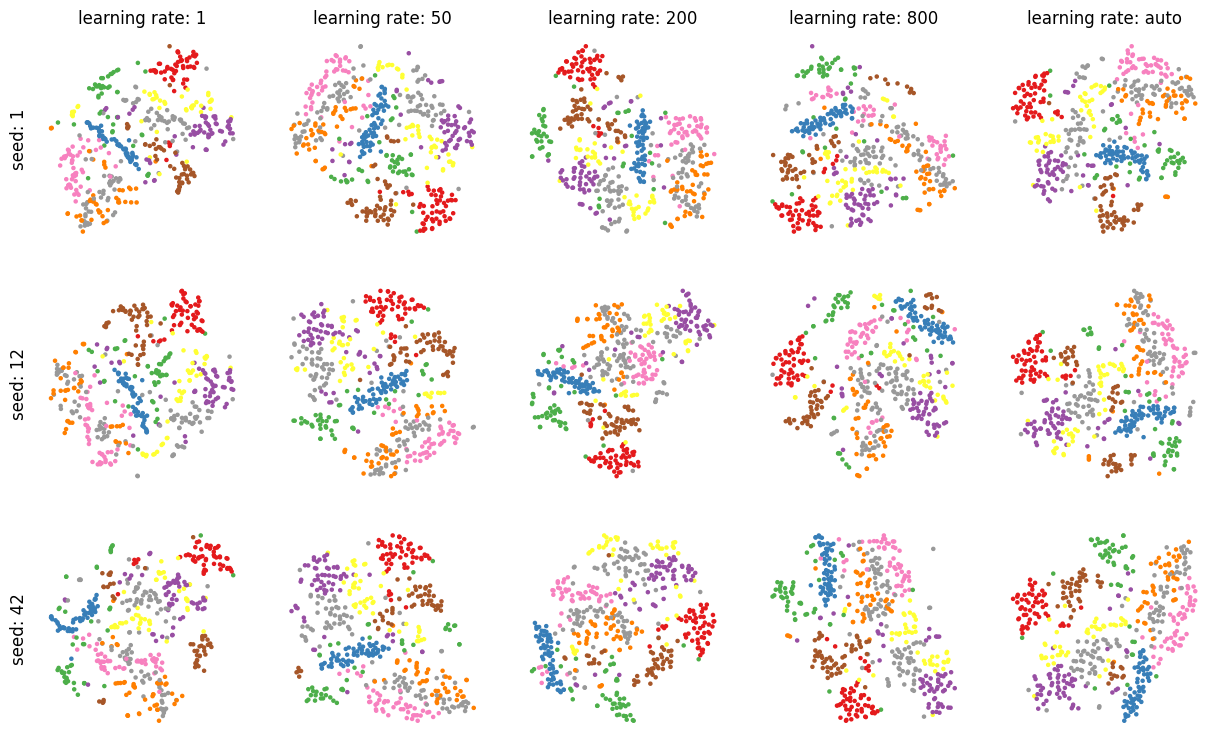

In [47]:
plot_embedding_grid(seeds, learning_rates, "seed", "learning rate", embedding_dict)